In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time

# to ignore the warnings
from warnings import filterwarnings

In [69]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [70]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12690 non-null  float64
 4   home_points     12690 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [71]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1552
home_points       1552
dtype: int64

In [72]:
# Convert date object to datetime data type
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            13926 non-null  datetime64[ns, UTC]
 1   visitor         14242 non-null  object             
 2   home            14242 non-null  object             
 3   visitor_points  12690 non-null  float64            
 4   home_points     12690 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(2)
memory usage: 556.5+ KB


In [73]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points
23,2024-11-05 00:45:00+00:00,Boston Celtics,Atlanta Hawks,NaN,NaN
46,2024-11-13 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
47,2025-01-19 00:00:00+00:00,Atlanta Hawks,Boston Celtics,NaN,NaN
65,2024-10-23 23:30:00+00:00,Brooklyn Nets,Atlanta Hawks,NaN,NaN
82,2025-03-16 22:00:00+00:00,Atlanta Hawks,Brooklyn Nets,NaN,NaN
...,...,...,...,...,...
14210,NaT,Toronto Raptors,Washington Wizards,NaN,NaN
14220,2025-01-30 00:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14221,2025-03-24 23:00:00+00:00,Toronto Raptors,Washington Wizards,NaN,NaN
14231,2025-03-06 00:00:00+00:00,Utah Jazz,Washington Wizards,NaN,NaN


In [74]:
# Getting today's date
todays_Date = dt.date.fromtimestamp(time.time())
 
# Calling the isoformat() function over the
# today's date
date_in_ISOFormat = todays_Date.isoformat()

# Create a dataframe with no dates past current day
df = scores_df.loc[scores_df['date'] <= date_in_ISOFormat]

# Reset index
df.reset_index(inplace=True, drop=True)

# Display
df

,date,visitor,home,visitor_points,home_points
0,2015-11-25 01:00:00+00:00,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09 23:30:00+00:00,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16 23:00:00+00:00,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19 23:00:00+00:00,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27 00:30:00+00:00,Boston Celtics,Atlanta Hawks,83.0,110.0
...,...,...,...,...,...
12730,2020-02-29 02:00:00+00:00,Washington Wizards,Utah Jazz,119.0,129.0
12731,2021-04-13 01:00:00+00:00,Washington Wizards,Utah Jazz,125.0,121.0
12732,2021-12-19 02:00:00+00:00,Washington Wizards,Utah Jazz,109.0,103.0
12733,2022-12-23 02:00:00+00:00,Washington Wizards,Utah Jazz,112.0,120.0


# Analysis

In [90]:
def possible_outcome(dataframe, away_team, home_team):
    # Get team names from user input
    # away_team = input("Enter the visitor team:")
    # home_team = input("Enter the home team")
    
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
        
    # Plot total points distribution with a KDE
    sns.displot(data=matchup_game, x='total_points', kde=True)
    plt.title(f'Total Points Distribution for {home_team} vs {away_team}')
    plt.show()

    # Plot the winner count    
    sns.countplot(matchup_game, x='winner')
    plt.title(f'Winner Counts: {home_team} vs {away_team}')
    plt.show()

    return matchup_game

In [91]:
teams = df['visitor'].unique()
teams

array(['Boston Celtics', 'Atlanta Hawks', 'Brooklyn Nets',
       'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
       'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons',
       'Golden State Warriors', 'Houston Rockets', 'Indiana Pacers',
       'LA Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies',
       'Miami Heat', 'Milwaukee Bucks', 'Minnesota Timberwolves',
       'New Orleans Pelicans', 'New York Knicks', 'Oklahoma City Thunder',
       'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns',
       'Portland Trail Blazers', 'Sacramento Kings', 'San Antonio Spurs',
       'Toronto Raptors', 'Utah Jazz', 'Washington Wizards'], dtype=object)

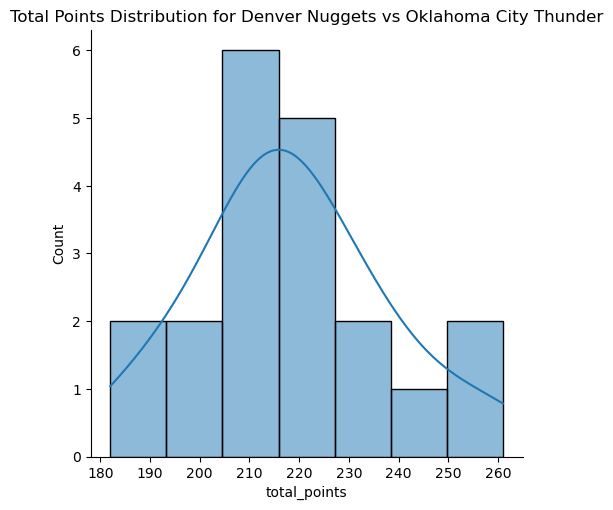

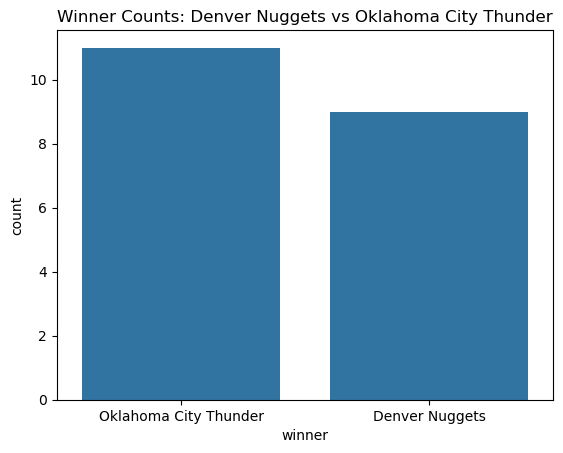

,date,visitor,home,visitor_points,home_points,total_points,winner
5630,2016-01-20 02:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,110.0,104.0,214.0,Oklahoma City Thunder
5631,2016-04-06 01:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,124.0,102.0,226.0,Oklahoma City Thunder
5632,2016-11-26 02:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,132.0,129.0,261.0,Oklahoma City Thunder
5633,2017-04-09 21:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,106.0,105.0,211.0,Oklahoma City Thunder
5634,2017-10-11 01:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,96.0,86.0,182.0,Oklahoma City Thunder
5635,2017-11-10 03:30:00+00:00,Oklahoma City Thunder,Denver Nuggets,94.0,102.0,196.0,Denver Nuggets
5636,2018-02-02 03:30:00+00:00,Oklahoma City Thunder,Denver Nuggets,124.0,127.0,251.0,Denver Nuggets
5637,2018-12-15 03:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,98.0,109.0,207.0,Denver Nuggets
5638,2019-02-27 03:30:00+00:00,Oklahoma City Thunder,Denver Nuggets,112.0,121.0,233.0,Denver Nuggets
5639,2019-12-15 02:00:00+00:00,Oklahoma City Thunder,Denver Nuggets,102.0,110.0,212.0,Denver Nuggets


In [96]:
possible_outcome(df, 'Oklahoma City Thunder', 'Denver Nuggets')
